In [4]:
import pandas as pd 

In [5]:
deliveries = pd.read_csv(r"C:\Users\SURESH\Inno 271-273\GenAI Internship\Task-2\diminos_data_v2\deliveries.csv")
deliveries.head()

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery


In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363008 entries, 0 to 1363007
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   order_id    1363008 non-null  int64 
 1   time_stamp  1363008 non-null  object
 2   status      1363008 non-null  object
dtypes: int64(1), object(2)
memory usage: 31.2+ MB


In [7]:
deliveries['time_stamp'] = pd.to_datetime(deliveries['time_stamp'])

In [8]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363008 entries, 0 to 1363007
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   order_id    1363008 non-null  int64         
 1   time_stamp  1363008 non-null  datetime64[ns]
 2   status      1363008 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 31.2+ MB


In [9]:
deliveries.duplicated().sum()

0

In [10]:
order_items = pd.read_csv(r"C:\Users\SURESH\Inno 271-273\GenAI Internship\Task-2\diminos_data_v2\order_items.csv")
order_items.head()

,order_id,items_ordered
0,321230114,"['p_025', 'p_032', 'p_037']"
1,321230115,"['p_017', 'p_012']"
2,321230116,"['p_027', 'p_037']"
3,321230117,"['p_004', 'p_029']"
4,321230118,"['p_017', 'p_037']"


In [11]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454336 entries, 0 to 454335
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   order_id       454336 non-null  int64 
 1   items_ordered  454336 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.9+ MB


In [12]:
order_items.duplicated().sum()

0

In [13]:
orders = pd.read_csv(r"C:\Users\SURESH\Inno 271-273\GenAI Internship\Task-2\diminos_data_v2\orders.csv")
orders.head()

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454336 entries, 0 to 454335
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   order_id         454336 non-null  int64 
 1   order_placed_at  454336 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.9+ MB


In [15]:
orders['order_placed_at'] = pd.to_datetime(orders['order_placed_at'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454336 entries, 0 to 454335
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   order_id         454336 non-null  int64         
 1   order_placed_at  454336 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.9 MB


In [16]:
orders.duplicated().sum()

0

In [17]:
products = pd.read_csv(r"C:\Users\SURESH\Inno 271-273\GenAI Internship\Task-2\diminos_data_v2\products.csv")
products.head()

,item_id,category,Item,Size,Price
0,p_001,Veg,Margherita,Regular,109
1,p_002,Veg,Margherita,Medium,245
2,p_003,Veg,Margherita,Large,455
3,p_004,Veg,Double Cheese Margherita,Regular,215
4,p_005,Veg,Double Cheese Margherita,Medium,385


In [18]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   37 non-null     object
 1   category  37 non-null     object
 2   Item      37 non-null     object
 3   Size      37 non-null     object
 4   Price     37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [19]:
products.duplicated().sum()

0

In [20]:
print(deliveries.shape)
print(order_items.shape)
print(orders.shape)
print(products.shape)

(1363008, 3)
(454336, 2)
(454336, 2)
(37, 5)


# 1. What is the average Delivery Time (in minutes) taken by the store to deliver the Pizza?

Round off the answer upto 2 decimal places.

In [21]:
df_merge = pd.merge(deliveries, orders, on = 'order_id', how = 'inner')
df_merge['delivery_time'] = df_merge['time_stamp'] - df_merge['order_placed_at']
df_merge['delivery_time_minutes'] = df_merge['delivery_time']/ pd.Timedelta(minutes = 1)
avg_delivery_time = df_merge[df_merge['status'] == 'Delivered']['delivery_time_minutes'].mean()
avg_delivery_time_record = round(avg_delivery_time, 2)
print(avg_delivery_time_record)

20.65


# 2. What is the 99th percentile Delivery Time (in minutes) taken by the store to deliver the Pizza?

In [22]:
percentile_99 = df_merge[df_merge['status'] == 'Delivered']['delivery_time_minutes'].quantile(0.99)
percentile_delivery_time_round = round(percentile_99)
print(percentile_delivery_time_round)

31


# 3. Which metric is the better choice to determine the stores performance based on Delivery Time?


In [23]:
median_delivery_time = df_merge[df_merge['status'] == 'Delivered']['delivery_time_minutes'].median()
round(median_delivery_time)

20

In [24]:
percentile_95 = df_merge[df_merge['status'] == 'Delivered']['delivery_time_minutes'].quantile(0.95)
round(percentile_95)

26

# 4. What is the order id with the maximum delivery time?


In [25]:
df_merge[df_merge['delivery_time'] == df_merge['delivery_time'].max()]['order_id'].iloc[0]

321629049

# 5. How many pizza's were ordered between 1st January and 31st January 2024 (INCLUSIVE)?


In [26]:
orders[(orders['order_placed_at'] >= '2024-01-01') & (orders['order_placed_at'] <= '2024-01-31')].shape[0]

11894

# 6. How many order took more than 30 minutes to deliver between 1st January and 31st January 2024 (INCLUSIVE)?

This is important as Diminos promise 30 minutes delivery. For any pizza delivered after 30 minutes, customer will get a full refund.

In [27]:
df_merge[df_merge['delivery_time_minutes'] >= 30.0].shape[0]

6119

# 7. What is the total amount Pizza store lost in 2023 due to refunds on late deliveries?


In [28]:
import ast

In [29]:
df_merge_2 = pd.merge(df_merge, order_items, on = 'order_id', how = 'inner')
df_merge_2['items_ordered'] = df_merge_2['items_ordered'].apply(ast.literal_eval)
df_merge_2 = df_merge_2.explode('items_ordered')
df_merge_2 = pd.merge(df_merge_2, products, left_on='items_ordered', right_on='item_id', how='left')
df_merge_2['delivery_time'] = df_merge_2['time_stamp'] - df_merge_2['order_placed_at']
df_merge_2['delivery_time_minutes'] = df_merge_2['delivery_time']/pd.Timedelta(minutes = 1)

In [30]:
# refund_percentage = 1.0
late_deliveries_2023 = df_merge_2[(df_merge_2['order_placed_at'].dt.year == 2023) & (df_merge_2['delivery_time_minutes'] > 30)]
late_deliveries_2023['Price'].sum()

1826393

# 8. In which year Pizza store has lost maximum amount due to refunds on late deliveries?


In [31]:
loss_amount = df_merge_2[(df_merge_2['status'] == 'Delivered') & (df_merge_2['delivery_time_minutes'] > 30.0)]
loss_amount['order_placed_at'].dt.year.value_counts().idxmax()

2023

# 9. How much revenue is generated by the pizza store till date? Don't include the refund amount in revenue.


In [32]:
total_revenue = df_merge_2['Price'].sum()
loss_revenue = loss_amount['Price'].sum()
revenue = total_revenue - loss_revenue
revenue

1217979030

# 10. (BONUS QUESTION) Which distribution can be used to model the number of orders incoming each hour? If we can somehow model it, which problem for owner of Pizza Store can be solved? 

(Implement this in a Jupyter Notebook. Upload your implementation on the google drive and share the link below.) 

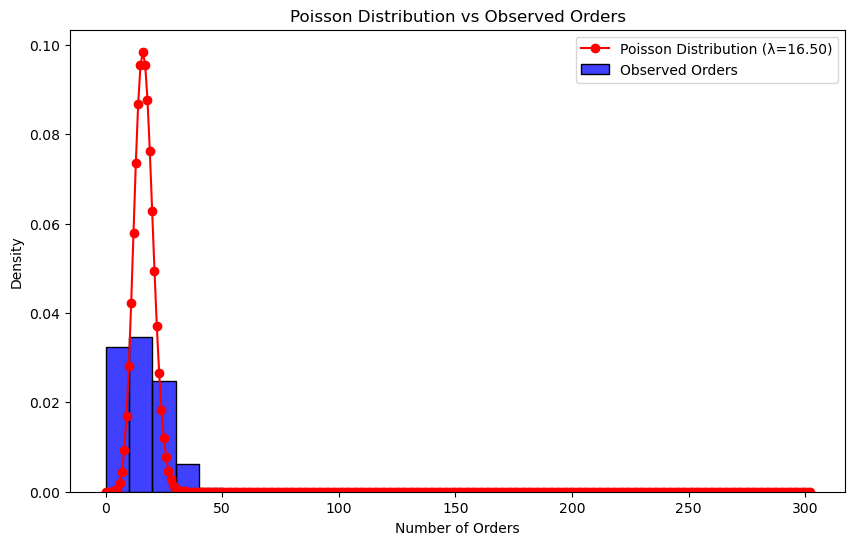

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson

orders_per_hour = orders.resample('H', on='order_placed_at').size()

# Calculate the average number of orders per hour (lambda)
avg_per_hour = orders_per_hour.mean()

# Fit Poisson distribution
x = np.arange(0, orders_per_hour.max() + 1)
poisson_dist = poisson.pmf(x, avg_per_hour)

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_hour, bins=30, kde=False, stat='density', label='Observed Orders', color='blue')
plt.plot(x, poisson_dist, 'ro-', label='Poisson Distribution (λ={:.2f})'.format(avg_per_hour))
plt.xlabel('Number of Orders')
plt.ylabel('Density')
plt.title('Poisson Distribution vs Observed Orders')
plt.legend()
plt.show()

In [42]:
ordersper_hour = orders.resample('H', on='order_placed_at').size()
ordersper_hour.max()

302

In [39]:
avg = ordersper_hour.mean()
avg


16.504504504504503